In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json
import numpy as np
from scipy.io import wavfile
import librosa
import pysynth
import pysynth_b
import pysynth_e
import math

Piano key frequencies (for equal temperament):
Key number	Scientific name	Frequency (Hz)
         1	             A0	         27.50
         2	            A#0	         29.14
         3	             B0	         30.87
         4	             C1	         32.70
         5	            C#1	         34.65
         6	             D1	         36.71
         7	            D#1	         38.89
         8	             E1	         41.20
         9	             F1	         43.65
        10	            F#1	         46.25
        11	             G1	         49.00
        12	            G#1	         51.91
        13	             A1	         55.00
        14	            A#1	         58.27
        15	             B1	         61.74
        16	             C2	         65.41
        17	            C#2	         69.30
        18	             D2	         73.42
        19	            D#2	         77.78
        20	             E2	         82.41
        21	             F2	         87.31
        22	            F#2	  

14336


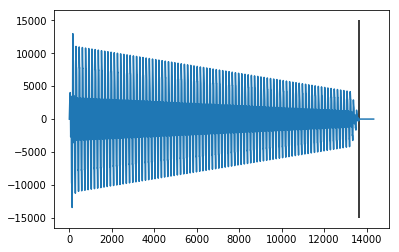

In [2]:
with open('metadata.json') as json_file:  
    metadata = json.load(json_file)
file = metadata['files'][15]['name']
fs, data = wavfile.read(file)
i=0

while(i<len(data)-20):
    fl = 0
    for j in range(50):
        if(math.fabs(data[i+j])>5):
            fl = 1
            break
    if(fl==0):
        break
    i=i+1
    
plt.vlines([i],-15000,15000)
print(len(data))
plt.plot(list(range(len(data))),data)
plt.show()

In [3]:
with open('metadata.json') as json_file:  
    metadata = json.load(json_file)
notes = ['a0', 'a#0', 'b0', 'c1', 'c#1', 'd1', 'd#1', 'e1', 'f1', 'f#1', 'g1', 'g#1', 'a1', 'a#1', 'b1', 'c2', 'c#2', 'd2', 'd#2', 'e2', 'f2', 'f#2', 'g2', 'g#2', 'a2', 'a#2', 'b2', 'c3', 'c#3', 'd3', 'd#3', 'e3', 'f3', 'f#3', 'g3', 'g#3', 'a3', 'a#3', 'b3', 'c4', 'c#4', 'd4', 'd#4', 'e4', 'f4', 'f#4', 'g4', 'g#4', 'a4', 'a#4', 'b4', 'c5', 'c#5', 'd5', 'd#5', 'e5', 'f5', 'f#5', 'g5', 'g#5', 'a5', 'a#5', 'b5', 'c6', 'c#6', 'd6', 'd#6', 'e6', 'f6', 'f#6', 'g6', 'g#6', 'a6', 'a#6', 'b6', 'c7', 'c#7', 'd7', 'd#7', 'e7', 'f7', 'f#7', 'g7', 'g#7', 'a7', 'a#7', 'b7', 'c8']
dic ={}
for i in range(len(notes)):
    dic[notes[i]]=i
    
    
X = np.zeros((len(metadata['files']),44102))
Y = np.zeros((len(metadata['files']),2))


for i in range(len(metadata['files'])):
    file = metadata['files'][i]['name']
    fs, data = wavfile.read(file)
    X[i][0] = ord(metadata['files'][i]['synth'][-1])-97
    
    w=0
    while(w<len(data)-50):
        fl = 0
        for j in range(50):
            if(math.fabs(data[w+j])>5):
                fl = 1
                break
        if(fl==0):
            break
        w=w+1
        
        
    if(len(data)>=44100):
        X[i][1:-1] = data[:44100]
    else:
        X[i][1:-1] = np.array(list(data[:])+[0]*(44100-len(data)))    
        
    X[i][-1]=w    
        
    note = dic[metadata['files'][i]['notes'][0]]
    dur = metadata['files'][i]['dur']
    Y[i][0]=note
    Y[i][1]=dur

In [4]:
dic2 = {}
for i in range(len(notes)):
    dic2[i]=notes[i]
print(len(notes))
dic2

88


{0: 'a0',
 1: 'a#0',
 2: 'b0',
 3: 'c1',
 4: 'c#1',
 5: 'd1',
 6: 'd#1',
 7: 'e1',
 8: 'f1',
 9: 'f#1',
 10: 'g1',
 11: 'g#1',
 12: 'a1',
 13: 'a#1',
 14: 'b1',
 15: 'c2',
 16: 'c#2',
 17: 'd2',
 18: 'd#2',
 19: 'e2',
 20: 'f2',
 21: 'f#2',
 22: 'g2',
 23: 'g#2',
 24: 'a2',
 25: 'a#2',
 26: 'b2',
 27: 'c3',
 28: 'c#3',
 29: 'd3',
 30: 'd#3',
 31: 'e3',
 32: 'f3',
 33: 'f#3',
 34: 'g3',
 35: 'g#3',
 36: 'a3',
 37: 'a#3',
 38: 'b3',
 39: 'c4',
 40: 'c#4',
 41: 'd4',
 42: 'd#4',
 43: 'e4',
 44: 'f4',
 45: 'f#4',
 46: 'g4',
 47: 'g#4',
 48: 'a4',
 49: 'a#4',
 50: 'b4',
 51: 'c5',
 52: 'c#5',
 53: 'd5',
 54: 'd#5',
 55: 'e5',
 56: 'f5',
 57: 'f#5',
 58: 'g5',
 59: 'g#5',
 60: 'a5',
 61: 'a#5',
 62: 'b5',
 63: 'c6',
 64: 'c#6',
 65: 'd6',
 66: 'd#6',
 67: 'e6',
 68: 'f6',
 69: 'f#6',
 70: 'g6',
 71: 'g#6',
 72: 'a6',
 73: 'a#6',
 74: 'b6',
 75: 'c7',
 76: 'c#7',
 77: 'd7',
 78: 'd#7',
 79: 'e7',
 80: 'f7',
 81: 'f#7',
 82: 'g7',
 83: 'g#7',
 84: 'a7',
 85: 'a#7',
 86: 'b7',
 87: 'c8'}

In [5]:
from sklearn.utils import shuffle
#X, Y = shuffle(X, Y, random_state=0)
print(X.shape,Y.shape)
Xtr, Xte, ytr, yte = train_test_split(X, Y, test_size = 0.2, random_state = 42)

(750, 44102) (750, 2)


In [6]:
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
mlc = MLPClassifier()
mlr = KNeighborsRegressor()

print("1")

mlc.fit(Xtr[:,:-1],ytr[:,0])
print("2")
mlr.fit(Xtr[:,-1].reshape(-1, 1),ytr[:,1])

print("3")

print(mlc.score(Xte[:10,:-1],yte[:10,0]))
print(mlr.score(Xte[:10,-1].reshape(-1, 1),yte[:10,1]))

1
2
3
1.0
0.8530957083605679


In [7]:
print(mlc.score(Xte[:,:-1],yte[:,0]))
print(mlr.score(Xte[:,-1].reshape(-1,1),yte[:,1]))

0.9933333333333333
0.6687795376993835


### testing

In [8]:
samp_x = Xte[7][:-1]
samp_y = yte[7][0]
print(samp_x.shape)
print(samp_y)
ans = mlc.predict([samp_x])
print(ans)

(44101,)
9.0
[9.]


In [9]:
import pysynth as ps_a
import pysynth_b as ps_b
import pysynth_e as ps_e
import pysynth_s as ps_s

import random

basic_notes = ['a0', 'a#0', 'b0', 'c1', 'c#1', 'd1', 'd#1', 'e1', 'f1', 'f#1', 'g1', 'g#1', 'a1', 'a#1', 'b1', 'c2', 'c#2', 'd2', 'd#2', 'e2', 'f2', 'f#2', 'g2', 'g#2', 'a2', 'a#2', 'b2', 'c3', 'c#3', 'd3', 'd#3', 'e3', 'f3', 'f#3', 'g3', 'g#3', 'a3', 'a#3', 'b3', 'c4', 'c#4', 'd4', 'd#4', 'e4', 'f4', 'f#4', 'g4', 'g#4', 'a4', 'a#4', 'b4', 'c5', 'c#5', 'd5', 'd#5', 'e5', 'f5', 'f#5', 'g5', 'g#5', 'a5', 'a#5', 'b5', 'c6', 'c#6', 'd6', 'd#6', 'e6', 'f6', 'f#6', 'g6', 'g#6', 'a6', 'a#6', 'b6', 'c7', 'c#7', 'd7', 'd#7', 'e7', 'f7', 'f#7', 'g7', 'g#7', 'a7', 'a#7', 'b7', 'c8']

basic_synths = {ps_a: 'pysynth_a', ps_b: 'pysynth_b', ps_e: 'pysynth_e'}

def get_random_notes(size):
    basic_notes_len = len(basic_notes)
    notes = []
    for _ in range(size):
        random_index = random.randint(1, basic_notes_len - 1)
        random_note = basic_notes[random_index]
        notes.append(random_note)
    #print(notes)
    return notes


def generate_wavfile_from_notes(notes,dur):
    size = len(notes)  
    text = tuple(zip(notes, [dur]*size))
    print(text)
    c = 1
    for synth in basic_synths:
        file_name = "sound_"+str(c)+".wav"
        synth.make_wav(text, fn=file_name)
        print("file "+str(c)+" done")
        c=c+1

def make_sound_files(size,dur):
    notes = get_random_notes(size)
    print(notes)
    generate_wavfile_from_notes(notes,dur)
    return notes
    

In [10]:
notes = make_sound_files(1,3)

['b1']
(('b1', 3),)
Writing to file sound_1.wav
[1/1]	

file 1 done
[1/1]	
Writing to file sound_2.wav

file 2 done
[1/1]	
Writing to file sound_3.wav

file 3 done


In [11]:
print(notes)

['b1']


In [12]:
note_nums=[dic[j] for j in notes]
print(note_nums)

[14]


[ 1536  4608  8192  9728 13824]
5
22050


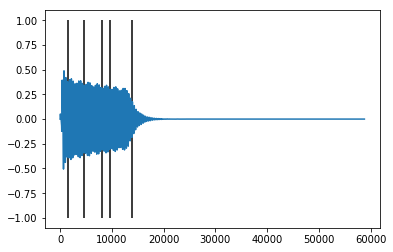

In [20]:
file = 'sound_2.wav'
arr , fs = librosa.load(file)
onset = librosa.onset.onset_detect(y = arr, sr = fs, units = 'samples')
print(onset)
print(len(onset))
print(fs)
plt.plot(list(range(len(arr))),arr)
plt.vlines(onset,-1,1)
plt.show()

In [33]:
print(len(arr))
if(len(arr)>=44100):
    print(len([1]+list(arr[0:44100])))
    samp = np.array([1]+list(arr[:44100]))
else:
    print(len([1]+list(arr[:])+[0]*(44100-len(arr))))
    samp = np.array([1] + list(arr[:])+[0]*(44100-len(arr)))    
        
print(samp.shape)        
ans = mlc.predict([samp])
print(ans)        
#42496

58800
44101
(44101,)
[26.]


In [30]:
deded = [1,2,3,4,5,6]
print(len([0]+deded[:3]))

4


[14336]
1
22050


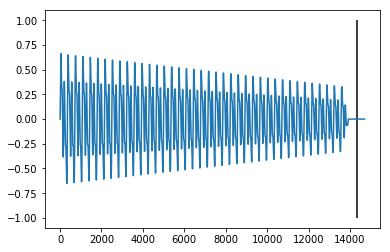

In [14]:
file = 'sound_1.wav'
arr , fs = librosa.load(file)
onset = librosa.onset.onset_detect(y = arr, sr = fs, units = 'samples')
print(onset)
print(len(onset))
print(fs)
plt.plot(list(range(len(arr))),arr)
plt.vlines(onset,-1,1)
plt.show()

In [95]:
ans = []
for i in range(len(onset)-1):
    t = arr[onset[i]:onset[i+1]]
    if(len(t)>4000):
   
        if(len(t)>=44100):
            temp = np.array([0] + list(t[:44100]))
            #temp = [0] + list(np.random.randn(44100))
        else:
            temp = np.array([0] + list(t) + [0]*(44100-len(t)))
            #temp = [0] + list(np.random.randn(44100))

        #plt.plot(list(range(len(temp))),temp)
        #plt.show()

        pred_note = mlc.predict([temp])
        pred_dur = mlr.predict([[len(t)]])
        ans.append([pred_note[0],pred_dur[0]])
    
        

print(ans)

[[61.0, 6.0839791638493494], [78.0, 5.46265366330595], [75.0, 5.618191519251775], [17.0, 5.868743698526549], [62.0, 5.868743698526549], [30.0, 5.46265366330595], [23.0, 6.0839791638493494], [23.0, 5.868743698526549], [30.0, 5.868743698526549]]


In [93]:
print(note_nums)

[42, 40, 86, 63, 5, 38, 75, 34, 70, 6]


In [94]:
final = []
for i in range(len(ans)):
    final.append(tuple([dic2[int(ans[i][0])],ans[i][1]]))
    
print(final)

[('d#7', 8.925205006283889), ('a#5', 6.0839791638493494), ('d#7', 5.46265366330595), ('c7', 5.618191519251775), ('d2', 5.868743698526549), ('b5', 5.868743698526549), ('d#3', 5.46265366330595), ('g#2', 6.0839791638493494), ('d#7', 8.925205006283889), ('g#2', 5.868743698526549), ('d#3', 5.868743698526549)]


In [83]:
pysynth_b.make_wav(tuple(final), fn = "jaishriram.wav")

[1/9]	
[5/9]	
[9/9]	
Writing to file jaishriram.wav



[ 5632 12800 20992 28672 36352 43520 51712 59392]
8
22050


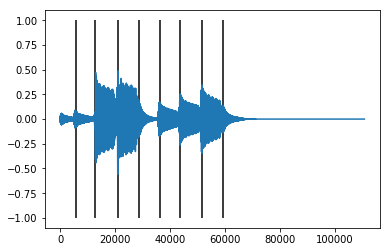

In [84]:
arr1 , fs1 = librosa.load("jaishriram.wav")
onset1 = librosa.onset.onset_detect(y = arr1, sr = fs1, units = 'samples')
print(onset1)
print(len(onset1))
print(fs1)
plt.plot(list(range(len(arr1))),arr1)
plt.vlines(onset1,-1,1)
plt.show()